In [24]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from skmultiflow.trees import HoeffdingTree
from sklearn import metrics
import matplotlib.pyplot as plt
from datasets import load_dataset

In [34]:
# Load and preprocess data
combined_df = load_dataset("liar")

In [35]:
type(combined_df)

datasets.dataset_dict.DatasetDict

In [36]:
train_dataframe = pd.DataFrame(combined_df['train'])
test_dataframe = pd.DataFrame(combined_df['test'])

In [37]:
type(train_dataframe)

pandas.core.frame.DataFrame

In [38]:
remove_train = []
remove_test = []

In [39]:
def count_zeros_and_ones(lst):
    count_zeros = 0
    count_ones = 0
    for num in lst['label']:
        if num == 0:
            count_zeros += 1
        elif num == 1:
            count_ones += 1
    return count_zeros, count_ones

In [40]:
for i in range(len(train_dataframe)):
    temp = train_dataframe.loc[i, "label"]
    if (temp == 0 or temp == 4):
        train_dataframe.loc[i, "label"] = 0
    if (temp == 2 or temp == 3):
        train_dataframe.loc[i, "label"] = 1
    if (temp == 5 or temp == 1):
        remove_train.append(i)

for i in range(len(test_dataframe)):
    temp = test_dataframe.loc[i, "label"]   
    if (temp == 0 or temp == 4):    #false and barely true
        test_dataframe.loc[i, "label"] = 0  
    if (temp == 2 or temp == 3):    #true and mostly true
        test_dataframe.loc[i, "label"] = 1
    if (temp == 5 or temp == 1):    #pants-fire and half true
        remove_test.append(i)


In [41]:
before_0_train, before_1_train = count_zeros_and_ones(train_dataframe)
before_0_test, before_1_test = count_zeros_and_ones(test_dataframe)
train_dataframe = train_dataframe.drop(remove_train)
test_dataframe = test_dataframe.drop(remove_test)
after_0_train, after_1_train = count_zeros_and_ones(train_dataframe)
after_0_test, after_1_test = count_zeros_and_ones(test_dataframe)

In [57]:
print(before_0_test,before_0_train,before_1_test,before_1_train)
print(after_0_test,after_0_train,after_1_test,after_1_train)
print (after_0_test+after_0_train+after_1_test+after_1_train)

464 3655 727 5772
464 3655 460 3649
8228


In [43]:
combined_df1 = train_dataframe
combined_df1 = combined_df1 + test_dataframe

In [44]:
# Split data into train and test sets
X_train1 = train_dataframe['statement']
y_train1 = train_dataframe['label']
X_test1 = test_dataframe['statement']
y_test1 = test_dataframe['label']

In [45]:
X_train = pd.Series(X_train1)
y_train = pd.Series(y_train1)
X_test = pd.Series(X_test1)
y_test = pd.Series(y_test1)

In [46]:
type(X_train)

pandas.core.series.Series

In [47]:
# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [48]:
# Train Passive Aggressive Classifier
pac = PassiveAggressiveClassifier(random_state=42)
pac.fit(X_train_tfidf, y_train)

PassiveAggressiveClassifier(random_state=42)

In [49]:
# Train SGD Classifier
sgd = SGDClassifier(loss='log_loss', random_state=42)
sgd.fit(X_train_tfidf, y_train)

SGDClassifier(loss='log_loss', random_state=42)

In [50]:
pac_pred = pac.predict(X_test_tfidf)
sgd_pred = sgd.predict(X_test_tfidf)

In [51]:
accuracy = accuracy_score(y_test, pac_pred)
print("Final accuracy PAC:", accuracy)

accuracy = accuracy_score(y_test, sgd_pred)
print("Final accuracy SDG:", accuracy)

Final accuracy PAC: 0.564935064935065
Final accuracy SDG: 0.5941558441558441


In [58]:
print(y_test)

0       1
1       0
2       0
5       1
6       1
       ..
1276    0
1279    0
1280    0
1281    0
1282    0
Name: label, Length: 924, dtype: int64


In [52]:
print("Confusion Matrix for PAC:")
print(confusion_matrix(y_test, pac_pred))
print()

print("Confusion Matrix for SGD:")
print(confusion_matrix(y_test, sgd_pred))
print()

Confusion Matrix for PAC:
[[256 208]
 [194 266]]

Confusion Matrix for SGD:
[[274 190]
 [185 275]]



In [60]:
import random

In [72]:
temp_array = random.sample(range(924), 17)

In [75]:
type(y_test)

pandas.core.series.Series

In [76]:
test_pred = y_test.copy()  # Make a copy to avoid modifying the original Series
for i in range(17):
    idx = temp_array[i]
    if idx in test_pred.index:
        k = test_pred[idx]
        if k == 1:
            k = 0
        else:
            k = 1
        test_pred[idx] = k
    else:
        print(f"Index {idx} not found in y_test Series.")


Index 237 not found in y_test Series.
Index 516 not found in y_test Series.
Index 451 not found in y_test Series.
Index 53 not found in y_test Series.
Index 770 not found in y_test Series.


In [77]:
confusion_matrix = metrics.confusion_matrix(y_test, test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

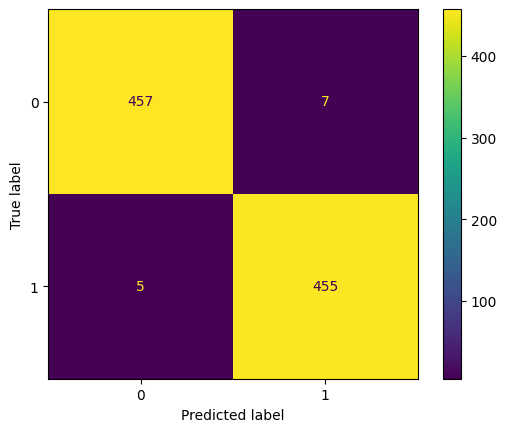

In [78]:
cm_display.plot()
plt.show()

In [ ]:
X_test_features = pd.DataFrame({'PAC': pac_pred, 'SGD': sgd_pred})

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_test_features, y_test)

In [ ]:
final_pred = gb.predict(X_test_features)

ACTUAL CODE:

In [ ]:
combined_df1 = pd.concat([train_dataframe, test_dataframe], ignore_index=True)

In [ ]:
# Train Hoeffding Tree classifier incrementally
ht = HoeffdingTree()
for i in range(len(combined_df1)):
    text = combined_df1.loc[i, 'statement']
    label = combined_df1.loc[i, 'label']
    X_partial = vectorizer.transform([text]).toarray()[0]
    ht.partial_fit([X_partial], [int(label)])

In [ ]:
# Get predictions
pac_pred = pac.predict(X_test_tfidf)
sgd_pred = sgd.predict(X_test_tfidf)
ht_pred = ht.predict(X_test_tfidf.toarray())

In [ ]:
# Concatenate predictions as features
X_test_features = pd.DataFrame({'PAC': pac_pred, 'SGD': sgd_pred, 'HT' :  ht_pred})

In [ ]:
# Train Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_test_features, y_test)

In [ ]:
# Get final predictions
final_pred = gb.predict(X_test_features)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, final_pred)
print("Final accuracy:", accuracy)

In [ ]:
accuracy = accuracy_score(y_test, pac_pred)
print("Final accuracy PAC:", accuracy)

accuracy = accuracy_score(y_test, sgd_pred)
print("Final accuracy SDG:", accuracy)
accuracy = accuracy_score(y_test, ht_pred)
print("Final accuracy HC:", accuracy)

In [ ]:
# Print confusion matrices
print("Confusion Matrix for PAC:")
print(confusion_matrix(y_test, pac_pred))
print()

print("Confusion Matrix for SGD:")
print(confusion_matrix(y_test, sgd_pred))
print()

print("Confusion Matrix for HT:")
print(confusion_matrix(y_test, ht_pred))
print()

print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test, final_pred))
print()

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, final_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

In [ ]:
cm_display.plot()
plt.show()

In [ ]:
Accuracy = metrics.accuracy_score(y_test, final_pred)
Precision = metrics.precision_score(y_test, final_pred)
Sensitivity_recall = metrics.recall_score(y_test, final_pred)
Specificity = metrics.recall_score(y_test, final_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, final_pred)
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})